In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
df = pd.read_csv(r'C:\data\mia_data2.csv')

In [3]:
df.keys()

Index(['Unnamed: 0.1', 'Unnamed: 0', 'YEAR', 'MONTH', 'DAY_OF_WEEK',
       'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'DEP_DELAY_NEW', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WHY_DELAY', 'DAY', 'DATE'],
      dtype='object')

In [4]:
# Deleting all flights were the flight was diverted
df = df[df.DIVERTED ==0]

In [5]:
#Deleting all rows where the flight was cancelled
df = df[df.CANCELLED == 0]


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 659119 entries, 0 to 736651
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0.1         659119 non-null  int64  
 1   Unnamed: 0           659119 non-null  int64  
 2   YEAR                 659119 non-null  int64  
 3   MONTH                659119 non-null  int64  
 4   DAY_OF_WEEK          659119 non-null  float64
 5   OP_CARRIER_FL_NUM    659119 non-null  int64  
 6   ORIGIN               659119 non-null  object 
 7   DEST                 659119 non-null  object 
 8   CRS_DEP_TIME         659119 non-null  int64  
 9   DEP_TIME             659119 non-null  float64
 10  DEP_DELAY            659119 non-null  float64
 11  DEP_DELAY_NEW        659119 non-null  float64
 12  CRS_ARR_TIME         659119 non-null  int64  
 13  ARR_TIME             659119 non-null  float64
 14  ARR_DELAY            659119 non-null  float64
 15  ARR_DELAY_NEW    

In [7]:
# I want to create dummy values based on the why delay column
dummy = pd.get_dummies(df['WHY_DELAY'])

In [8]:
dummy

,0,carrier,late aircraft,nas,security,weather
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
736647,1,0,0,0,0,0
736648,1,0,0,0,0,0
736649,1,0,0,0,0,0
736650,0,0,0,1,0,0


In [9]:
df = pd.concat([df, dummy], axis = 1)
df.keys()

Index(['Unnamed: 0.1', 'Unnamed: 0', 'YEAR', 'MONTH', 'DAY_OF_WEEK',
       'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'DEP_DELAY_NEW', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WHY_DELAY', 'DAY', 'DATE', '0', 'carrier', 'late aircraft', 'nas',
       'security', 'weather'],
      dtype='object')

In [10]:
df.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0', 'OP_CARRIER_FL_NUM', 'CANCELLATION_CODE', 'DIVERTED',  'CARRIER_DELAY','WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'DATE', 'WHY_DELAY', 'carrier', 'late aircraft', 'nas','security', 'OP_CARRIER_FL_NUM', 'CANCELLED']  , inplace = True)

In [11]:
df.head()

,YEAR,MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DAY,0,weather
0,2010,5,6.0,STT,MIA,1535,1519.0,-16.0,0.0,1840,1835.0,-5.0,0.0,185.0,196.0,1,1,0
1,2010,5,7.0,STT,MIA,1535,1550.0,15.0,15.0,1840,1840.0,0.0,0.0,185.0,170.0,2,1,0
2,2010,5,1.0,STT,MIA,1535,1550.0,15.0,15.0,1840,1846.0,6.0,6.0,185.0,176.0,3,1,0
3,2010,5,2.0,STT,MIA,1535,1533.0,-2.0,0.0,1840,1829.0,-11.0,0.0,185.0,176.0,4,1,0
4,2010,5,3.0,STT,MIA,1535,1557.0,22.0,22.0,1840,1848.0,8.0,8.0,185.0,171.0,5,1,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 659119 entries, 0 to 736651
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 659119 non-null  int64  
 1   MONTH                659119 non-null  int64  
 2   DAY_OF_WEEK          659119 non-null  float64
 3   ORIGIN               659119 non-null  object 
 4   DEST                 659119 non-null  object 
 5   CRS_DEP_TIME         659119 non-null  int64  
 6   DEP_TIME             659119 non-null  float64
 7   DEP_DELAY            659119 non-null  float64
 8   DEP_DELAY_NEW        659119 non-null  float64
 9   CRS_ARR_TIME         659119 non-null  int64  
 10  ARR_TIME             659119 non-null  float64
 11  ARR_DELAY            659119 non-null  float64
 12  ARR_DELAY_NEW        659119 non-null  float64
 13  CRS_ELAPSED_TIME     659119 non-null  float64
 14  ACTUAL_ELAPSED_TIME  659119 non-null  float64
 15  DAY              

In [13]:
# Due to the size and complexity of the data set, I am only going to focus on arrivals for the time being.
df_arr = df[df.DEST == 'MIA']


In [14]:
df_arr.keys()

Index(['YEAR', 'MONTH', 'DAY_OF_WEEK', 'ORIGIN', 'DEST', 'CRS_DEP_TIME',
       'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'ARR_DELAY_NEW', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',
       'DAY', '0', 'weather'],
      dtype='object')

In [15]:
# In df_ arr, the DEST value is the same for all flights, I will be eliminating that column as well as everything that has to 
# deal with departures.

df_arr.drop(columns = ['CRS_DEP_TIME','DEST', 'DEP_DELAY_NEW', 'DEP_TIME', 'DEP_DELAY'], inplace = True)




C:\Users\Fernando Araiza\AppData\Local\Temp\ipykernel_3264\324790782.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_arr.drop(columns = ['CRS_DEP_TIME','DEST', 'DEP_DELAY_NEW', 'DEP_TIME', 'DEP_DELAY'], inplace = True)


In [16]:
# Converting Origin to numerical data by using get_dummies for arrivals
temp = pd.get_dummies(df_arr.ORIGIN, prefix = 'ORIGIN')



In [17]:
temp

,ORIGIN_ATL,ORIGIN_AUS,ORIGIN_BDL,ORIGIN_BGR,ORIGIN_BHM,ORIGIN_BNA,ORIGIN_BOS,ORIGIN_BWI,ORIGIN_CAE,ORIGIN_CHS,...,ORIGIN_SLC,ORIGIN_STL,ORIGIN_STT,ORIGIN_STX,ORIGIN_TLH,ORIGIN_TPA,ORIGIN_TTN,ORIGIN_TUL,ORIGIN_TYS,ORIGIN_XNA
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736642,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
736644,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
736645,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
736647,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#Join the two dataframes
df_arr = pd.concat([df_arr, temp], axis = 1)

In [19]:
# Creating y for arrivals and dropping weather and origin column for df_arr
y_arr = df_arr['weather']

In [20]:
df_arr.drop(columns = ['weather', 'ORIGIN'], inplace = True)

In [21]:
df_arr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329362 entries, 0 to 736648
Data columns (total 86 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 329362 non-null  int64  
 1   MONTH                329362 non-null  int64  
 2   DAY_OF_WEEK          329362 non-null  float64
 3   CRS_ARR_TIME         329362 non-null  int64  
 4   ARR_TIME             329362 non-null  float64
 5   ARR_DELAY            329362 non-null  float64
 6   ARR_DELAY_NEW        329362 non-null  float64
 7   CRS_ELAPSED_TIME     329362 non-null  float64
 8   ACTUAL_ELAPSED_TIME  329362 non-null  float64
 9   DAY                  329362 non-null  int64  
 10  0                    329362 non-null  uint8  
 11  ORIGIN_ATL           329362 non-null  uint8  
 12  ORIGIN_AUS           329362 non-null  uint8  
 13  ORIGIN_BDL           329362 non-null  uint8  
 14  ORIGIN_BGR           329362 non-null  uint8  
 15  ORIGIN_BHM       

In [22]:
# Split train, test for df_arrival
X_arr_train, X_arr_test, y_arr_train, y_arr_test = train_test_split(df_arr, y_arr, test_size = .33, random_state = 42)

In [23]:
#Function to implement SMOTE
def create_smote(X_arr_train, y_arr_train):
    from imblearn.over_sampling import SMOTE
    sm = SMOTE(random_state = 42, sampling_strategy = 1.0)
    X_train, y_train = sm.fit_resample(X_arr_train, y_arr_train)
    return [X_train, y_train]


In [24]:
smoted = create_smote(X_arr_train, y_arr_train)
X_arr_train = smoted[0] 
y_arr_train = smoted[1]

In [25]:
# These functions are to interpret and print the results of the maching learning algorithms. 
#There are two functions, one for that had iterable parameter thus had multiple results and the other for those who didn't
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import seaborn as sns

#A dictionary will be used to save all the results from the different algorithms for analysis later on.
t_results = {}
def testing_results(test_name, y_test, y_pred, t_results):    
   
    
    acc_score = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    ROC =  roc_auc_score(y_test, y_pred)
    
    print(f'Accuracy score with {test_name} is {acc_score}.')
    print(f'Classification report for {test_name} is \n {class_report}.')
    print(f'Confusion matrix for {test_name} is \n {conf_matrix}.')   
    print(f'ROC-AUC score is {ROC}.')
    t_results[test_name] = [acc_score, class_report, conf_matrix, ROC]
    return t_results
    
def iterable_testing_results(test_name, y_test, array, t_results) :
    trinket = {}
    for item in array.items():
        trinket[item[0]] = accuracy_score(y_test, item[1])
    max_score = max(trinket.values())
    best_n = max(trinket, key=trinket.get)
    
    acc_score = accuracy_score(y_test, array[best_n])
    class_report = classification_report(y_arr_test, array[best_n])
    conf_matrix = confusion_matrix(y_arr_test, array[best_n])
    ROC =  roc_auc_score(y_test, array[best_n])
    print(best_n)
    print(f'{best_n} makes the best n value with a score of {max_score}.')
    print(f'Classification report for {test_name} \n {class_report}.')
    print(f'Confusion Matrix for {test_name} is \n {conf_matrix}.')
    print(f'ROC-AUC score is {ROC}.')
    t_results[test_name] = [acc_score, class_report, conf_matrix, ROC]
    return t_results


In [26]:
# Logistic Regression
def Logistic_Regression(X_train, y_train, X_test):
    from sklearn.linear_model import LogisticRegression
    c_range = [0.001,0.01,0.1,1,10,100]
    results = {}
    for c in c_range:
        lgreg = LogisticRegression(C = c, class_weight = {0:.91, 1:.09})
        lgreg.fit(X_arr_train, y_arr_train)
        predlgreg = lgreg.predict(X_arr_test)
        results[c] = predlgreg
    return results    


In [ ]:
# Arrival Logistic Regression
lg_score = Logistic_Regression(X_arr_train, y_arr_train, X_arr_test)

In [28]:
t_arr_results_0 = iterable_testing_results('Logistic Regression', y_arr_test, lg_score, t_results)

1
1 makes the best n value with a score of 0.9819854632440886.
Classification report for Logistic Regression 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    107087
           1       0.11      0.03      0.05      1603

    accuracy                           0.98    108690
   macro avg       0.55      0.51      0.52    108690
weighted avg       0.97      0.98      0.98    108690
.
Confusion Matrix for Logistic Regression is 
 [[106680    407]
 [  1551     52]].
ROC-AUC score is 0.5143192642363928.


In [29]:
# Random Forest Classifier
def Random_Forest(X_train, y_train, X_test):
    from sklearn.ensemble import RandomForestClassifier
    
    rf=RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=12, random_state=42)
    rf.fit(X_train, y_train)
    rf_y_pred = rf.predict(X_test)
    return [rf_y_pred, rf] 



In [30]:
#Arrival Random Forest
rf_results = Random_Forest(X_arr_train, y_arr_train, X_arr_test)

In [31]:
t_arr_results_1 = testing_results('Random Forest Classifier', y_arr_test, rf_results[0], t_results)

Accuracy score with Random Forest Classifier is 0.7752691139939277.
Classification report for Random Forest Classifier is 
               precision    recall  f1-score   support

           0       0.99      0.78      0.87    107087
           1       0.04      0.59      0.07      1603

    accuracy                           0.78    108690
   macro avg       0.52      0.68      0.47    108690
weighted avg       0.98      0.78      0.86    108690
.
Confusion matrix for Random Forest Classifier is 
 [[83319 23768]
 [  658   945]].
ROC-AUC score is 0.6837846369292927.


In [32]:
# Decision Tree Classifier
def Decision_Tree_Classifier(X_train, y_train, X_test):
    from sklearn.tree import DecisionTreeClassifier
    DTC = DecisionTreeClassifier(criterion = 'gini', random_state = 42, max_depth = 3, min_samples_leaf=5)
    DTC.fit(X_train, y_train)
    DTC_y_predict = DTC.predict(X_test)
    return DTC_y_predict


In [33]:
DTC_y_predict = Decision_Tree_Classifier(X_arr_train, y_arr_train, X_arr_test)

In [34]:
t_arr_results_2 = testing_results('Decision Tree Classifier', y_arr_test, DTC_y_predict, t_arr_results_1)

Accuracy score with Decision Tree Classifier is 0.7032293679271322.
Classification report for Decision Tree Classifier is 
               precision    recall  f1-score   support

           0       0.99      0.70      0.82    107087
           1       0.03      0.65      0.06      1603

    accuracy                           0.70    108690
   macro avg       0.51      0.68      0.44    108690
weighted avg       0.98      0.70      0.81    108690
.
Confusion matrix for Decision Tree Classifier is 
 [[75394 31693]
 [  563  1040]].
ROC-AUC score is 0.6764139530069186.


In [35]:
# Naive Bayes Gaussian NB
def NBG (X_train, y_train, X_test):
    from sklearn.naive_bayes import GaussianNB
    gaussian = GaussianNB()
    gaussian.fit(X_train, y_train)
    gaus_pred = gaussian.predict(X_test)
    return gaus_pred

In [36]:
gaus_pred = NBG(X_arr_train, y_arr_train, X_arr_test)

In [37]:
t_arr_results_3 = testing_results('Naive Bayes Gaussian', y_arr_test, gaus_pred, t_arr_results_2)

Accuracy score with Naive Bayes Gaussian is 0.5648541724169657.
Classification report for Naive Bayes Gaussian is 
               precision    recall  f1-score   support

           0       0.99      0.56      0.72    107087
           1       0.02      0.70      0.05      1603

    accuracy                           0.56    108690
   macro avg       0.51      0.63      0.38    108690
weighted avg       0.98      0.56      0.71    108690
.
Confusion matrix for Naive Bayes Gaussian is 
 [[60274 46813]
 [  483  1120]].
ROC-AUC score is 0.6307703612656614.


In [38]:
# Gradient Boosting
def Grad_Boosting(X_train, y_train, X_test):
    from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
    gbc = GradientBoostingClassifier(subsample=0.8, learning_rate=0.05 , n_estimators=160, random_state=5, max_depth=9, max_leaf_nodes=100)
    gbc.fit(X_arr_train, y_arr_train)

    #Predict using the model:

    y_predict_gbc = gbc.predict(X_arr_test)
    return  y_predict_gbc

In [39]:
y_predict_gbc = Grad_Boosting(X_arr_train, y_arr_train, X_arr_test)

In [40]:
t_arr_results_4 = testing_results('Gradient Boosting', y_arr_test, y_predict_gbc, t_arr_results_3)

Accuracy score with Gradient Boosting is 0.9755819302603735.
Classification report for Gradient Boosting is 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    107087
           1       0.22      0.27      0.24      1603

    accuracy                           0.98    108690
   macro avg       0.61      0.63      0.62    108690
weighted avg       0.98      0.98      0.98    108690
.
Confusion matrix for Gradient Boosting is 
 [[105610   1477]
 [  1177    426]].
ROC-AUC score is 0.6259795958488076.


# Machine Learning Analysis

In [41]:
# t_results[test_name] = [acc_score, class_report, conf_matrix, ROC]
t_results = t_arr_results_4
ml = list(t_results.keys())
result_values = list(t_results.values())
acc_scores_analysis = []
class_report_analysis = []
conf_matrix_analysis = []
ROC_analysis= []
for lists in result_values:
    acc_scores_analysis.append(lists[0])
    class_report_analysis.append(lists[1])
    conf_matrix_analysis.append(lists[2])
    ROC_analysis.append(lists[3])




<function matplotlib.pyplot.show(close=None, block=None)>

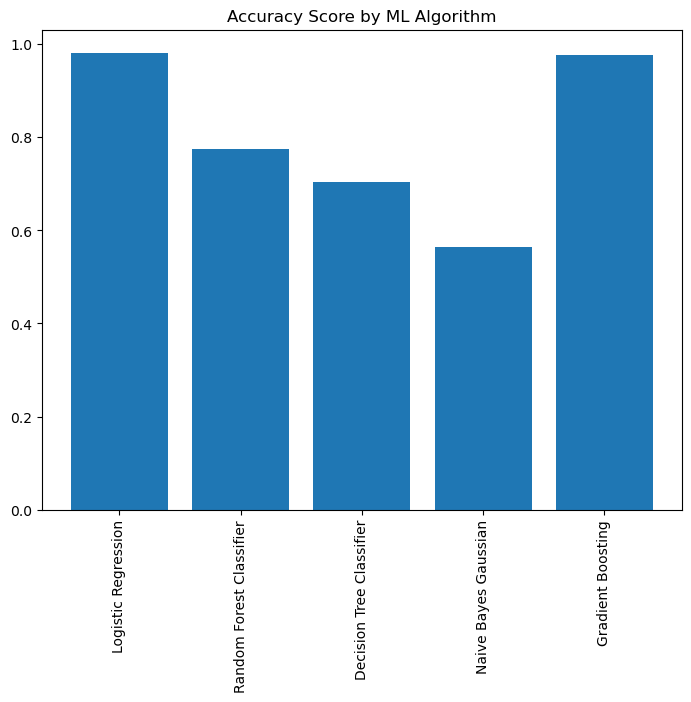

In [42]:

# Create a graph to compare the accuracy of each model
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ml, acc_scores_analysis)
plt.setp(ax.get_xticklabels(), rotation = 'vertical')
plt.title('Accuracy Score by ML Algorithm')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

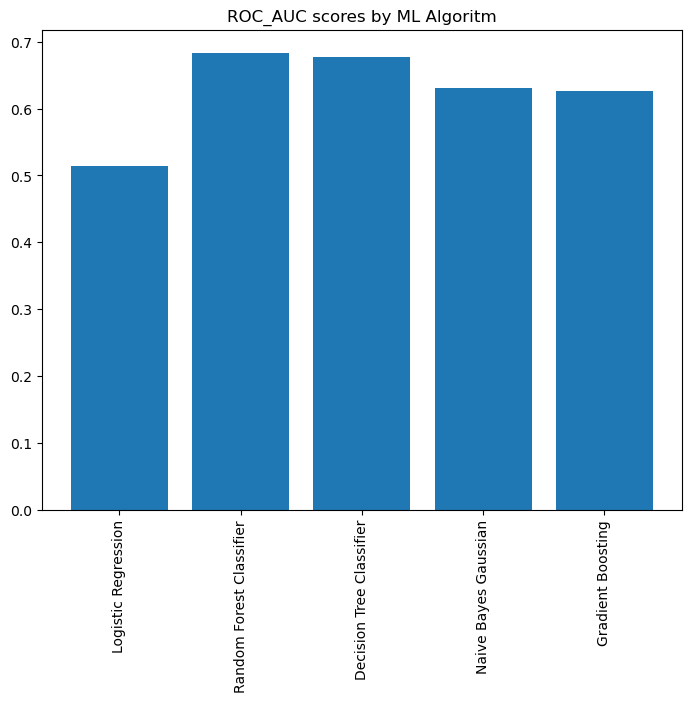

In [43]:
# Bar graph of ROC_AUC scores
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ml, ROC_analysis)
plt.setp(ax.get_xticklabels(), rotation = 'vertical')
plt.title('ROC_AUC scores by ML Algoritm')

plt.show



In [ ]:
# Going to use RandomizedSearchCV to try to optomize the parameters. Tried to use GridSearchCV as well but it is too computation
# intensive.# However, I am still using ROC_AUC scoring for the final evaluation.
 

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
spectrum = {}


param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10,12,16], "n_estimators": [50, 100,400,700,1000]}

RSCV = RandomizedSearchCV(estimator=rf_results[1], param_distributions=param_grid, scoring= 'roc_auc', cv=3, n_jobs=-1)

RSCV_results = RSCV.fit(X_arr_train, y_arr_train)

rf=RandomForestClassifier(**RSCV.best_params_)
rf.fit(X_arr_train, y_arr_train)
rf_y_pred = rf.predict(X_arr_test)
ROC_test =roc_auc_score(y_arr_test, rf_y_pred)

 
    



In [ ]:
feature_scores = pd.Series(rf_results[1].feature_importances_, index = X_arr_train.columns).sort_values(ascending = False)

In [ ]:
# Eliminating all columns with 0 value.
feature_scores = feature_scores[feature_scores >0]

In [ ]:
def min_feature_scores(feature_scores, rf_results, t_arr_results_5, df_arr, y_arr):
    roc_score = t_arr_results_5['Random Forest Classifier'][-1] * 100
    n = 100
    t_results = {}
    # final_score will keep track of the columns dropped.
    final_score = {}
    while n >= roc_score:
        column_drop = feature_scores.idxmin()
        df = df_arr.drop(columns = column_drop)
        X_arr_train, X_arr_test, y_arr_train, y_arr_test = train_test_split(df_arr, y_arr, test_size = .33, random_state = 42)
        smoted = create_smote(X_arr_train, y_arr_train)
        X_arr_train = smoted[0]
        y_arr_train = smoted[1]
        results = Random_Forest(X_arr_train, y_arr_train, X_arr_test)
        test_results =  testing_results('Random Forest Classifier', y_arr_test, results[0], t_results)
        n = test_results['Random Forest Classifier'][-1] * 100
        final_score[column_drop] = [n]
        if n>= roc_score:
            roc_score = n
            df_arr = df
            feature_scores = pd.Series(results[1].feature_importances_, index = X_arr_train.columns).sort_values(ascending = False)
            final_score[column_drop].append(feature_scores)
    return [df, final_score]
        
     

In [ ]:
best_df = min_feature_scores(feature_scores, rf_results, t_arr_results_5, df_arr, y_arr)


In [ ]:
answer = list(best_df[1].values())


In [ ]:
ganga = max(best_df[1].values())

In [ ]:
feature_score = ganga[1]

In [ ]:
# Plot feature_scores
feature_score.nlargest(20).plot(title= 'Feature Importance', xlabel = 'Features', kind = 'barh', ylabel = 'Relative Importance' )

In [ ]:
final_df = df_arr.drop(columns = 'ORIGIN_BNA')

In [ ]:
final_df.to_csv(r'C:\data\final_arr_df.csv')